In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

#검증
from sklearn.metrics import accuracy_score, f1_score #정확도 측정
from sklearn.metrics import confusion_matrix, classification_report #정오분류표, 리포트

In [70]:
df = pd.read_csv('c://bd092_data/BankPersonalLoan.csv')
df.head()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [69]:
df.head()
df.head()
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
x.head()
y.sort_values(ascending=False)

4282    1
4292    1
662     1
2986    1
671     1
       ..
3258    0
3259    0
3260    0
3261    0
0       0
Name: Personal Loan, Length: 5000, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [20]:
#분류나무 모델
tree_m = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=1)
tree_m.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [26]:
y_pred = tree_m.predict(x_test)
tree_m.score(x_test, y_test) # 학습된 모델에 x_test 넣어서 y_test 나올 평균 정확도 

0.9806666666666667

In [28]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred))
confmat

,0,1
0,1344,12
1,17,127


In [29]:
# 정오표를 좀 더 보기 쉽게 나타내라. 
print('오분류 갯수 : %s' %(y_test != y_pred).sum())
print('정확도 : %.3f' %accuracy_score(y_test, y_pred))
print('f정확도 : %.3f' %f1_score(y_test, y_pred))

오분류 갯수 : 29
정확도 : 0.981
f정확도 : 0.898


In [42]:
# 최적화 하기 : 최적화 : 함수 옵션 조정해주는 과정
# 여기서 최적화 : 의사결정나무모형 예측 정확도 제일 높은 지점 찾기 위해 하는 것, 지점 찾아서 옵션 수정할 것임. 
# 1. make pipeline 함수로 의사결정나무모형 옵션들 찾기 
from sklearn.pipeline import make_pipeline, Pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier())
pipe_tree.get_params().keys()
#옵션 이름들 찾았다. 
#이제 어떤 옵션에서 예측 정확도가 최대 되는지, 그 지점 찾자. 



dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [1]:

from sklearn.model_selection import GridSearchCV

param_range1 = range(1,11)
param_range2 = range(5, 26, 5)

param_grid = [{'decisiontreeclassifier__max_depth' : param_range1, 
              'decisiontreeclassifier__min_samples_leaf' : param_range2}] # {}으로 쌍을 만들어주고, 쌍으로 구성된 리스트를 만든다.

clf_cv = GridSearchCV(estimator = pipe_tree, #GridSearchCV 함수 : 의사결정나무 모델 예측이 제일 정확해지는 지점 찾아라. 
            param_grid = param_grid,
            scoring = 'accuracy',
            n_jobs = -1,
            cv = 10)
clf_cv.fit(x_train, y_train) # x_train, y_train 값 모형에 넣었을 때 모델 예측 제일 정확해지는 지점 찾아라. 

NameError: name 'pipe_tree' is not defined

## GridSearchCV 사용하면 교차타당성 검증한다. 
## 교차타당성 검증은 : train 데이터를 무수히 쪼개서 그 안에서 다시 테스트데이터/ train데이터로 나눈다. 
## 쪼개진 가운데 테스트 - train 데이터로 구성해서 여러 번 수없이 검증하고, 정확도 측정한다. 
## 결과적으로 train 데이터들로 막 연산돌렸을 때, 어느 파라미터 값에서 대체로 정확도가 높게 나오는지 볼 수 있다. 
## 정확도 대체로 높게 나오는 파라미터 값을 GridSearchCV 함수로 찾은 것이다. 
## 위 과정들 때문에 clf_cv.fit() 에 x와 y train 데이터들을 학습시켜 넣은 것이다. 


In [51]:
print(clf_cv.best_score_)#예측이 가장 정확할때 정확도는 몇점? 
print(clf_cv.best_params_)#예측이 가장 정확한 지점에서 파라미터 값들은 뭐였나? 

0.9848571428571429
{'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 10}


In [53]:
# 최대 깊이는 5까지, leaf최소 갯수는 10일때 까지 분할할 때, 모델 예측 정확도가 제일 높았다. 

In [59]:
tree_m_new = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=1)
tree_m_new.fit(x_train,y_train) #x가 대충 ~~ 이 정도 값일 때 y값을 0, 1로 분류해주는 모델을 만들어 학습시켰다. 

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=1)

In [62]:
y_pred = tree_m_new.predict(x_test)
tree_m_new.score(x_test, y_test) #정확도 직접 측정 

0.9806666666666667

In [64]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred))
confmat

,0,1
0,1346,10
1,19,125


In [65]:
print('오분류 갯수 : %d' %(y_test != y_pred).sum())
print('정확도 : %.3f' %accuracy_score(y_test, y_pred))
print('f점수 : %.3f' %f1_score(y_test,y_pred)) # 데이터가 imbalanced 데이터라 조화평균 썼다. 이게 더 정확도를 잘 보여주니까. 

오분류 갯수 : 29
정확도 : 0.981
f점수 : 0.896


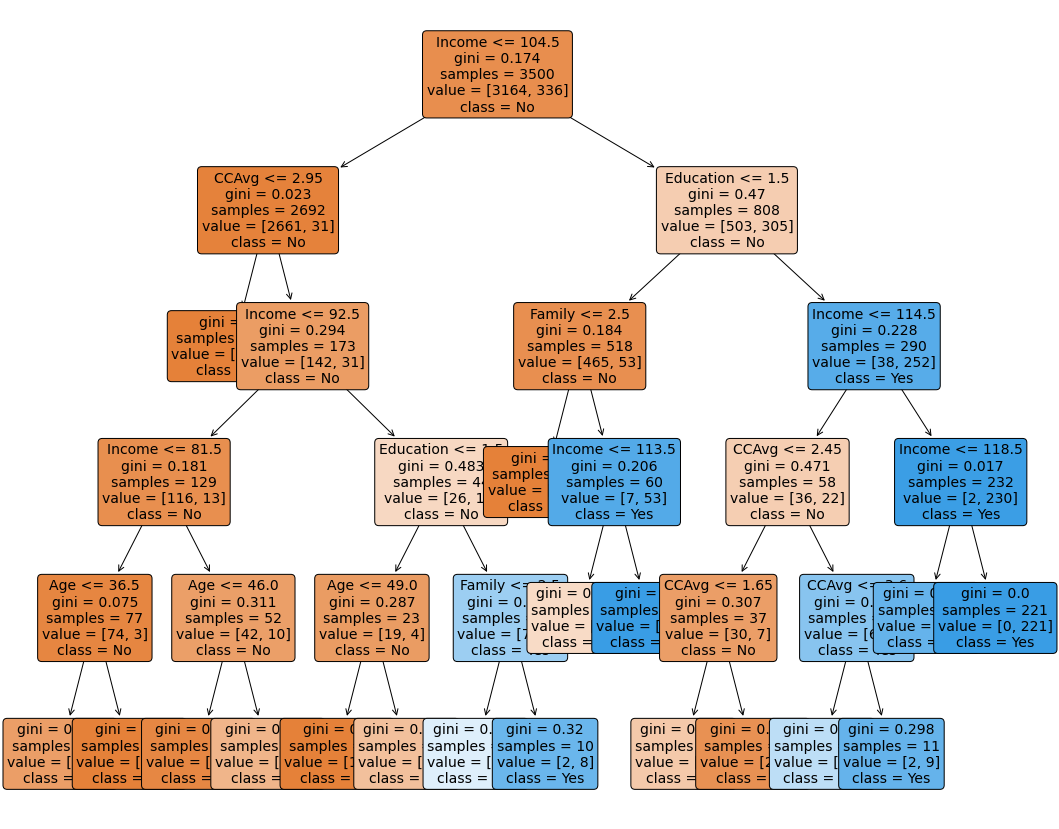

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_name = x.columns.tolist() # x 값들 설정
target_name = np.array(['No', 'Yes']) # 0 또는 1로 y값 설정
plt.figure(figsize=(18,15)) # plt 시각화 함수에서 의사결정 나무 사이즈 설정

tree = plot_tree(tree_m_new, 
                feature_names = feature_name,
                class_names = target_name,
                filled=True,
                rounded=True,
                fontsize=14)